## 클래스는 왜 필요한가?

가장 많이 사용하는 프로그래밍 언어 중 하나인 C 언어에는 클래스가 없다. 이 말은 굳이 클래스 없이도 프로그램을 충분히 만들 수 있다는 말과도 같다. 파이썬으로 잘 만들어진 프로그램들을 살펴보아도 클래스를 이용하지 않고 작성된 것들이 상당히 많다. 클래스는 지금까지 공부한 함수나 자료형처럼 프로그램 작성을 위해 꼭 필요한 요소는 아니다. <p>
하지만 프로그램 작성시 클래스를 적재적소에 이용하면 프로그래머가 얻을 수 있는 이익은 상당하다. <p>
예제를 통해 한번 생각해 보자.
여러분 모두 계산기를 사용해 봤을 것이다. 계산기에 3이라는 숫자를 입력하고 + 기호를 입력한 후 4를 입력하면 결과값으로 7을 보여준다. 다시 한 번 + 기호를 입력한 후 3을 입력하면 기존 결과값 7에 3을 더해 10을 보여준다. 즉, 계산기는 이전에 계산된 결과값을 항상 메모리 어딘가에 저장하고 있어야 한다.
    
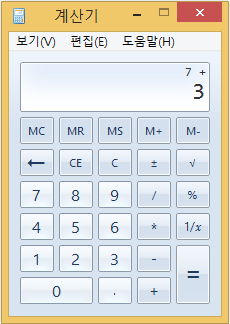

이런 내용을 우리가 앞서 익힌 함수를 이용해 구현해 보자. 계산기의 "더하기" 기능을 구현한 파이썬 코드는 다음과 같다.

In [ ]:
result = 0

def add(num):   
    result += num #당연히 이 부분때문에 에러가 날 것이다.
    return result

print(add(3))
print(add(4))

### 글로벌 전역변수
이전에 계산된 결과값을 유지하기 위해서 result라는 전역 변수(global)를 사용할 수 있다.
실행하면 예상한 대로 다음과 같은 결과값이 출력된다.

In [ ]:
result = 0

def add(num):   
    global result #함수 바깥에 있는 result 값을 함수안에서 접근할 수 있게 해준다.
    result += num #당연히 이 부분때문에 에러가 날 것이다.
    return result

print(add(3))
print(add(4))

그런데 만약 한 프로그램에서 2개의 계산기가 필요한 상황이 발생하면 어떻게 해야 할까? 각각의 계산기는 각각의 결과값을 유지해야 하기 때문에 위와 같이 add 함수 하나만으로는결과값을 따로 유지할 수 없다.
이런 상황을 해결하려면 다음과 같이 함수를 각각 따로 만들어야 한다.

In [ ]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

똑같은 일을 하는 add1과 add2라는 함수가 만들어졌고 각각의 함수에서 계산된 결과값을 유지하면서 저장하기 위한 전역 변수 result1, result2가 필요하게 되었다.

결과값은 다음과 같이 의도한 대로 출력된다.

계산기 1의 결과값이 계산기 2에 아무런 영향을 끼치지 않음을 확인할 수 있다. 하지만 계산기가 3개, 5개, 10개로 점점 더 많이 필요해진다면 어떻게 해야 할 것인가? 그때마다 전역변수와 함수를 추가할 것인가? 여기에 빼기나 곱하기등의 기능을 추가해야 한다면 상황은 점점 더 어려워 질 것이다.

아직 클래스에 대해서 배우진 않았지만 위와 같은 경우 클래스를 이용하면 다음과 같이 간단하게 해결할 수 있다.

In [15]:
### 클래스의 장점1: 계산결과의 저장
class Calculator:
    def __init__(self):
        self.result=0
    
    def add(self,num):
        self.result = self.result+num
        return self.result

문법설명은 차차 하겠다. 결과를 살펴보자

In [17]:
cal = Calculator()
print(cal.add(3))
print(cal.add(4))
print(cal.add(5))

3
7
12


글로벌 전역변수를 선언하지 않았는데도 계산결과가 저장되어 유지되고 있다!

In [19]:
### 클래스의 장점2: 서로 다른 상태를 저장하고 있는 계산기 2개 생성 가능
cal2= Calculator()
print(cal2.add(17))
print(cal2.add(3))

17
20


서로 다른 계산기를 아까보다 훨씬 쉽게 생성시킬 수 있다!

In [20]:
### 클래스의 장점3: 새로운 기능의 손쉬운 추가
class Calculator:
    def __init__(self):
        self.result=0
    
    def add(self,num):
        self.result = self.result+num
        return self.result
    
    def sub(self, num):
        self.result = self.result-num
        return self.result    

다음과 같이 계산기 안에 덧셈 뿐만아니라 뺄셈기능을 추가하고 활용할 수 있다!

In [21]:
cal = Calculator()
print(cal.add(3))
print(cal.sub(4))
print(cal.add(5))
print(cal.sub(2))


3
-1
4
2


Calculator 클래스로 만들어진 cal1, cal2라는 별개의 계산기(파이썬에서는 이것을 객체라고 한다)가 각각의 역할을 수행한다. 그리고 계산기(cal1, cal2)의 결과값 역시 다른 계산기의 결과값과 상관없이 독립적인 결과값을 유지한다. 클래스를 이용하면 계산기의 개수가 늘어나더라도 객체를 생성하기만 하면 되기 때문에 함수를 사용하는 경우와 달리 매우 간단해진다.

## 클래스와 객체

과자를 만드는 과자틀과 만들어진 과자들이다.

과자틀 → 클래스 (class)
과자틀에 의해서 만들어진 과자들 → 객체 (object)
이 사진을 보면 클래스가 어떤건지 감이 잡힐 것이다.
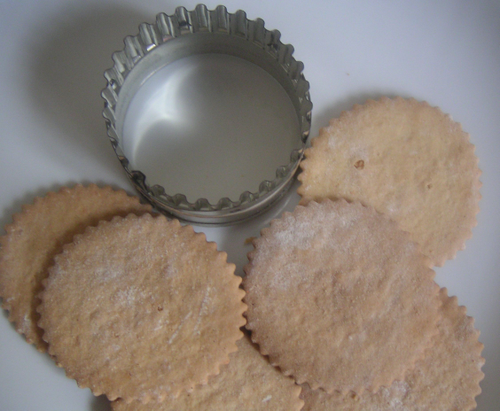
이 절에서 설명할 클래스는 과자틀과 비슷하다.

클래스(class)란 똑같은 무엇인가를 계속해서 만들어낼 수 있는 설계 도면 같은 것이고(과자 틀), 객체(object)란 클래스에 의해서 만들어진 피조물(과자틀에 의해서 만들어진 과자)을 뜻한다.

클래스에 의해서 만들어진 객체에는 중요한 특징이 있다. 그것은 객체별로 독립적인 성격을 갖는다는 것이다. 과자틀에 의해서 만들어진 과자에 구멍을 뚫거나 조금 베어먹더라도 다른 과자들에는 아무 영향이 없는것과 마찬가지로 동일한 클래스에의해 생성된 객체들은 서로에게 전혀 영향을 주지 않는다.

다음은 파이썬 클래스의 가장 간단한 예이다.

In [22]:
class Cookie:
    pass

위의 클래스는 아무런 기능도 갖고 있지 않은 껍질뿐인 클래스이다. 하지만 이렇게 껍질뿐인 클래스도 객체를 생성하는 기능은 가지고 있다. "과자 틀"로 "과자"를 만드는 것처럼 말이다.

객체는 클래스에 의해서 만들어지며 1개의 클래스는 무수히 많은 객체를 만들어낼 수 있다. 위에서 만든 Cookie 클래스의 객체를 만드는 방법은 다음과 같다.

In [23]:
a = Cookie()
b = Cookie()

Cookie()의 결과값을 돌려받은 a와 b가 바로 객체이다. 마치 함수를 사용해서 그 결과값을 돌려받는 모습과 비슷하다.

## 계산기 클래스 만들기

백견(見)이 불여 일타(打)"라고 했다. 클래스도 직접 만들어 가며 배워 보도록 하자.

사칙연산을 해 주는 클래스를 작성해 보도록 하자. 사칙연산은 더하기, 빼기, 나누기, 곱하기를 말한다.

### 클래스를 어떻게 만들지 먼저 구상하기
클래스는 무작정 만들기 보다는 클래스에 의해서 만들어진 객체를 중심으로 어떤 식으로 동작하게 할 것인지 미리 구상을 한 후에 생각했던 것들을 하나씩 해결하면서 완성해 나가는 것이 좋다.

사칙연산을 가능하게 하는 FourCal이라는 클래스가 다음처럼 동작한다고 가정해 보자.

In [ ]:
# a = FourCal()처럼 입력해서 a라는 객체를 만든다.
a = FourCal()

# a.setdata(4,2)를 해서 계산할 두가지 숫자를 지정해주고
a.setdata(4,2)

# 다음처럼 사칙연산하면서 작동시키고 싶다. 
print(a.sum()) #두 수의 합
print(a.mul()) #두 수의 곱
print(a.sub()) #두 수의 차
print(a.div()) #두 수 나누기

### 클래스 구조 만들기
자, 그렇다면 지금부터는 앞에서 구상했던 것처럼 동작하는 클래스를 만들어 보자. 제일 먼저 할 일은 a = FourCal()처럼 객체를 만들 수 있게 하는 것이다. 일단은 아무 기능이 없어도 되기 때문에 만드는 것은 매우 간단하다. 다음을 따라 해보자.

In [5]:
## 클래스 구조 만들기
class Fourcal:
    pass

현재 상태에서 FourCal 클래스는 아무런 변수나 메서드도 포함하지 않지만 우리가 원하는 객체 a를 만들 수 있는 기능은 가지고 있다. 확인해 보자.

In [7]:
a=Fourcal()
type(a) #a는 Fourcal 클래스의 인스턴스이다.

__main__.Fourcal

위와 같이 a = FourCal()로 a라는 객체를 먼저 만들고 그 다음에 type(a)로 a라는 객체가 어떤 타입인지 알아보았다. 역시 객체 a가 FourCal 클래스의 인스턴스임을 알 수 있다.

### 객체에 숫자 지정할 수 있게 만들기
하지만 생성된 객체 a는 아직 아무런 기능도 하지 못한다. 이제 더하기, 나누기, 곱하기, 빼기등의 기능을 하는 객체를 만들어야 한다. 그런데 이러한 기능을 갖춘 객체를 만들려면 우선적으로 a라는 객체에 사칙연산을 할 때 사용할 2개의 숫자를 먼저 알려주어야 한다. 다음과 같이 연산을 수행할 대상(4, 2)을 객체에 지정할 수 있게 만들어 보자.

In [11]:
# 객체에 숫자 저장할수 있게 하기.
class FourCal:
    def setdata(self, first, second):
        self.first=first
        self.second=second

이전에 만들었던 FourCal 클래스에서 pass라는 문장을 삭제하고 class 내부에 setdata라는 함수를 만들었다. 클래스 안에 구현된 함수는 다른말로 메서드(Method)라고 부른다. 앞으로 클래스 내의 함수는 항상 메서드라고 표현할테니 용어를 기억해 두도록 하자.

일반적인 함수를 만들 때 우리는 다음과 같이 작성한다.

In [ ]:
def 함수명(매개변수):
    수행할 문장
    ...

메서드도 클래스에 포함되어 있다는 점만 제외하면 일반함수와 다를 것이 없다.

다만 아래 setdata 메서드를 살펴보면 self라는 매개변수가 들어와 있음을 알 수 있다.

In [ ]:
def setdata(self, first, second):   # ① 메서드의 매개변수
    self.first = first              # ② 메서드의 수행문
    self.second = second            # ② 메서드의 수행문

### 매개변수 self의 의미

setdata라는 메서드는 self, first, second라는 총 3개의 매개변수를 필요로 하는데 실제로는 a.setdata(4, 2) 처럼 4와 2라는 2개의 값만 전달한 것이다.

왜 그럴까?

그 이유는 a.setdata(4, 2)처럼 호출하면 setdata 메서드의 첫 번째 매개변수 self에는 setdata메서드를 호출한 객체 a가 자동으로 전달되기 때문이다.

다음 그림을 보면 객체와 호출 입력 값들이 메서드에 어떻게 전달되는지 쉽게 이해가 갈 것이다.
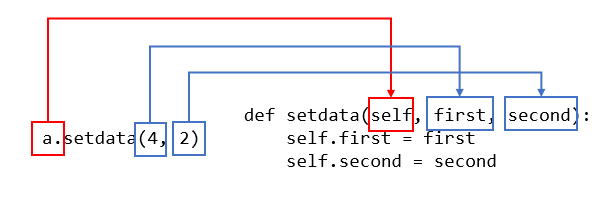
파이썬 클래스에서 가장 헷갈리는 부분이 바로 이 부분이다. setdata라는 메서드는 매개변수로 3개를 필요로 하는데 왜 a.setdata(4, 2)처럼 2개만 입력해도 실행이 되는가? 이 질문에 대한 답변을 여러분도 이제는 알았을 것이다.

파이썬 메서드의 첫번째 매개변수명은 관례적으로 self라는 이름을 사용한다. 호출 시 호출한 객체 자신이 전달되기 때문에 self("self"는 자기자신이라는 뜻을 가진 영어단어이다.)라는 이름을 사용하게 된 것이다. 물론 self말고 다른 이름을 사용해도 상관은 없다.

### 메서드 내의 수행문

In [ ]:
self.first = first
self.second = second

위 수행문이 뜻하는 바는 무엇일까? 입력 인수로 받은 first는 4이고 second는 2라는 것은 앞에서 이미 알았다. 그렇다면 위의 문장은 다음과 같이 바뀔 것이다.

In [ ]:
self.first = 4
self.second = 2

여기서 중요한 것은 바로 self이다. self는 a.setdata(4, 2)처럼 호출했을 때 자동으로 들어오는 객체 a라고 했다. 그렇다면 self.first의 의미는 무엇이겠는가? 당연히 a.first가 될 것이다. 또한 self.second는 당연히 a.second가 될 것이다.

따라서 위의 두 문장을 풀어서 쓰면 다음과 같이 된다.

In [ ]:
a.first = 4
a.second = 2

#### 객체변수(instance variable)는 객체에 정의된 변수를 의미하며 객체간 서로 공유되지 않는 특징을 갖는다.

In [12]:
a=FourCal()
a.setdata(4,2)
print(a.first)
print(a.second)

4
2


In [13]:
b=FourCal()
b.setdata(3,7)
print(b.first)
print(b.second)

3
7


a와 b라는 객체는 모두 first라는 변수를 가지고 있지만 그 변수의 값은 각기 다르다. b 객체의 first 변수에 3이라는 값을 대입하더라도 a의 first 값이 3으로 변경되지는 않는다. a, b 객체의 first변수는 고유의 저장 영역을 가지고 있는 객체 변수이기 때문이다.

객체 변수(예: a.first)는 그 객체의 고유한 값을 저장할 수 있는 공간이다. 객체 변수는 다른 객체들에 의해 영향받지 않고 독립적으로 그 값을 유지한다는 점을 꼭 기억하도록 하자. 클래스에서는 이 부분을 이해하는 것이 가장 중요하다.

다음은 현재까지 완성된 FourCal클래스이다.

### 더하기 기능 만들기
자! 그럼 2개의 숫자값을 설정해 주었으니 2개의 숫자를 더하는 기능을 추가해 보자. 우리는 다음과 같이 더하기 기능을 갖춘 클래스를 만들어야 한다.

In [27]:
class FourCal:
    def setdata(self, first, second):
        self.first=first
        self.second=second
    
    def sum(self):
        result = self.first+self.second
        return result

새롭게 추가된 것은 sum이라는 메서드이다.

클래스를 위와 같이 변경하고 다음과 같이 클래스를 사용해 보자.

In [28]:
a=FourCal()
a.setdata(4,2)
print(a.sum())

6


해당 메서드에서는 입력 매개변수로 self만 있다. 이는 이미 저장되어 있는 객체변수를 사용하기 때문이다.

### 모든 사칙연산 기능 만들기

In [32]:
class FourCal:
    def setdata(self, first, second):
        self.first=first
        self.second=second
    
    def sum(self):
        result = self.first+self.second
        return result
    
    def mul(self):
        result = self.first*self.second
        return result

    def sub(self):
        result = self.first-self.second
        return result
    
    def div(self):
        result = self.first/self.second
        return result

In [33]:
hey=FourCal()
hey.setdata(4,2)
print(hey.sum())
print(hey.mul())
print(hey.div())
print(hey.sub())

6
8
2.0
2


### 생성자
이번에는 우리가 만든 FourCal 클래스를 다음과 같이 사용해 보자.

In [34]:
a = FourCal()
a.sum()

AttributeError: 'FourCal' object has no attribute 'first'

FourCal 클래스의 인스턴스 a에 setdata메서드를 수행하지 않고 sum 메서드를 수행하면 "AttributeError: 'FourCal' object has no attribute 'first'" 라는 오류가 발생하게 된다. setdata 메서드를 수행해야 객체 a의 객체변수 first와 second이 생성되기 때문이다.

이렇게 객체에 초기값을 설정해야 할 필요가 있을때는 setdata와 같은 메서드를 호출하여 초기값을 설정하기 보다는 생성자를 구현하는 것이 안전한 방법이다.

생성자(Constructor)란 객체가 생성될 때 자동으로 호출되는 메서드를 의미한다.

파이썬 메서드명으로 __init__ 을 사용하면 이 메서드는 생성자가 된다. 다음과 같이 FourCal클래스에 생성자를 추가해 보자.

In [35]:
class FourCal:
    def __init__(self, first, second):
        self.first=first
        self.second=second
    
    def setdata(self, first, second):
        self.first=first
        self.second=second
    
    def sum(self):
        result = self.first+self.second
        return result
    
    def mul(self):
        result = self.first*self.second
        return result

    def sub(self):
        result = self.first-self.second
        return result
    
    def div(self):
        result = self.first/self.second
        return result

새로 생성된 __init__ 메서드만 따로 떼서 살펴보자

In [ ]:
def __init__(self, first, second):
    self.first = first
    self.second = second

__init__ 메서드는 setdata메서드와 이름만 다르고 모든게 동일하다. 단, 메서드 이름을 __init__으로 했기 때문에 생성자로 인식되어 객체가 생성되는 시점에 자동으로 호출되는 차이가 있다.

이제 다음처럼 예제를 수행 해 보자.

In [36]:
a=FourCal()

TypeError: __init__() missing 2 required positional arguments: 'first' and 'second'

a = FourCal() 수행 시 생성자 __init__ 이 호출되어 위와 같은 오류가 발생했다. 오류가 발생한 이유는 생성자의 매개변수인 first와 second에 해당되는 값이 전달되지 않았기 때문이다.

위 오류를 해결하려면 다음처럼 first와 second에 해당되는 값을 전달하여 객체를 생성해야 한다.

In [38]:
a = FourCal(4, 2)
print(a.first, a.second)

4 2


### 클래스의 상속

상속(Inheritance)이란 "물려받다"라는 뜻으로, "재산을 상속받다"라고 할 때의 상속과 같은 의미이다. 클래스에도 이런 개념을 적용할 수가 있다. 어떤 클래스를 만들 때 다른 클래스의 기능을 물려받을 수 있게 만드는 것이다.

이번에는 상속의 개념을 이용하여 우리가 만든 FourCal 클래스에 ab (a의 b승)을 구할 수 있는 기능을 추가 해 보자.

FourCal클래스를 상속하는 MoreFourCal클래스는 다음과 같이 간단하게 만들 수 있다. (앞서 구현한 FourCal 클래스는 이미 만들어 놓았다고 가정한다.)

In [40]:
class NewFourCal(FourCal):
    pass

클래스를 상속하기 위해서는 다음처럼 클래스명 뒤 괄호 안에 상속할 클래스명을 넣어 주면 된다.

In [ ]:
class 클래스명(상속할 클래스명)

NewFourCal 클래스는 FourCal클래스를 상속했으므로 FourCal클래스의 모든 기능을 사용할 수 있어야 할 것이다.

다음과 같이 확인 해보자.

In [41]:
a=NewFourCal(4,2)
print(a.sum())
print(a.div())

6
2.0


이제 원래 목적인 a의 b승 (ab) 을 계산해 주는 NewFourCal클래스를 만들어 보자.

In [42]:
class NewFourCal(FourCal):
    def pow(self):
        result=self.first ** self.second
        return result

In [43]:
a=NewFourCal(4,2)
print(a.pow())

16


MoreFourCal 클래스로 만들어진 a객체에 4와 2라는 값을 세팅한 후 pow메서드를 호출하면 4의 2승 (42)인 16을 리턴해 주는 것을 확인할 수 있다.

상속은 MoreFourCal 클래스처럼 기존 클래스(FourCal)는 그대로 놔둔채로 클래스의 기능을 확장시키고자 할 때 주로 사용된다.

### 메서드 오버라이딩

이번에는 FourCal 클래스를 다음과 같이 실행 해 보자.

In [45]:
a=FourCal(4,0)
a.div()

ZeroDivisionError: division by zero

FourCal클래스의 객체 a에 4와 0이라는 값을 세팅하고 div메서드를 호출하면 4를 0으로 나누려고 하기 때문에 위와같은 ZeroDivisionError 오류가 발생하게 된다.

하지만 0으로 나눌 때 오류가 아닌 0을 리턴하도록 만들고 싶다면 어떻게 해야 할까?

다음과 같이 FourCal클래스를 상속하는 SafeFourCal클래스를 만들어 보자.

In [47]:
class SafeFourCal(FourCal):
    def div(self):
        if self.second==0:
            return 0
        else:
            return self.first/self.second

SafeFourCal 클래스는 FourCal클래스에 있는 div라는 메서드를 동일한 이름으로 다시 작성하였다. 이렇게 부모 클래스(상속한 클래스)에 있는 메서드를 동일한 이름으로 다시 만드는 것을 메서드 오버라이딩(Overriding, 덮어쓰기)이라고 한다. 이렇게 메서드를 오버라이딩하면 부모 클래스의 메서드 대신 오버라이딩한 메서드가 호출된다.

SafeFourCal 클래스에 오버라이딩한 div 메서드는 나누는 값이 0인 경우에는 0을 리턴하도록 수정했다.

이제 다시 위에서 수행했던 예제를 FourCal클래스 대신 SafeFourCal 클래스를 이용하여 수행해 보자.

In [49]:
a=SafeFourCal(4,0)
a.div()

0

### 클래스 변수

객체변수는 다른 객체들에 의해 영향받지 않고 독립적으로 그 값을 유지한다는 점을 이미 알아보았다. 이번에는 객체변수와는 성격이 다른 클래스 변수에 대해서 알아보자.

다음의 클래스를 작성해 보자.

In [50]:
class Family:
    lastname="김"

Family 클래스에 선언된 lastname이 바로 클래스 변수이다. 클래스 변수는 클래스 안에 함수를 선언하는 것과 마찬가지로 클래스 안에 변수를 선언하여 생성한다.

이제 Family 클래스를 다음과 같이 사용해 보자.

In [51]:
print(Family.lastname)

김


객체변수와 달리 클래스변수는 클래스 이름으로 바로 접근하는 데에 차이가 있다.

In [52]:
a=Family()
b=Family()

In [53]:
print(a.lastname)
print(b.lastname)

김
김


또한 클래스변수는 생성된 객체를 통해서도 사용할 수 있다.

만약 Family 클래스의 lastname을 다음과 같이 "박"이라는 문자열로 바꾸면 어떻게 될까?

In [54]:
Family.lastname="박"

In [55]:
print(a.lastname)
print(b.lastname)

박
박


클래스 변수의 값을 변경했더니 클래스에 의해 생성된 객체들의 lastname 값들도 모두 함께 변경된다는 것을 확인할 수 있다. 즉, 클래스 변수는 클래스에 의해 생성된 모든 객체에 공유된다는 특징을 갖고 있다.

id 함수를 이용하면 클래스 변수가 공유된다는 사실을 증명할 수 있다. (※ id 함수는 객체의 주소를 리턴해 주는 파이썬 내장함수이다.)

In [56]:
print(id(Family.lastname))
print(id(a.lastname))
print(id(b.lastname))

2117738494272
2117738494272
2117738494272


id 값이 모두 같으므로 Family.lastname, a.lastname, b.lastname은 모두 같은 곳을 바라보고 있음을 알 수 있다.

클래스 변수를 가장 늦게 설명하는 이유는 클래스에서 클래스 변수보다는 객체 변수가 훨씬 중요하기 때문이다. 실제 실무적인 프로그래밍을 할 때도 클래스 변수보다는 객체 변수를 사용하는 비율이 훨씬 높다.

## 클래스의 활용

지금까지 클래스가 무엇인지에 대해서 문법적인 측면에서 살펴보았다. 이번에는 활용적인 측면에서 한번 살펴보도록 하자.

우선 다음과 같은 규칙을 지닌 문자열이 있다고 가정해 보자.

홍길동|42|A

위 문자열은 이름, 나이, 성적을 |(파이프문자) 로 구분하여 표기한 문자열이다. 예를들어 홍길동|42|A를 해석하면 다음과 같다.

항목:	값<p>
이름:	홍길동<p>
나이:	42<p>
성적:	A<p>

홍길동에서 나이를 추출해 내려면 다음과 같이 코딩해야 한다.

In [57]:
data = "홍길동|42|A"
temp=data.split("|")
age=temp[1]

만약 이런 형식의 문자열을 전달하여 나이를 출력해야 하는 함수가 필요하다면 다음과 같이 작성해야 한다.

In [59]:
def print_age(data):
    temp=data.split("|")
    age=temp[1]
    print(age)
data = "홍길동|42|A"
print_age(data)

42


마찬가지로 이름과 점수를 출력해야 하는 함수가 필요하다면 다음과 같이 작성해야 한다.

In [62]:
def print_grade(data):
    tmp = data.split("|")
    name = tmp[0]
    grade = tmp[2]
    print("%s님 당신의 점수는 %s입니다." % (name, grade))

data = "홍길동|42|A"
print_grade(data)

홍길동님 당신의 점수는 A입니다.


위 예에서 보듯이 이런 형태의 문자열을 함수 단위로 항상 주고 받아야 한다면 매번 문자열을 split해서 사용해야 하므로 뭔가 개선이 필요함을 느낄 수 있을 것이다.

클래스를 이용하면 좀 더 개선된 코드를 작성할 수 있다.

다음과 같은 클래스를 작성해 보자.

In [63]:
class Data:
    def __init__(self, data):
        tmp = data.split("|")
        self.name = tmp[0]
        self.age = tmp[1]
        self.grade = tmp[2]

홍길동|42|A 와 같은 문자열을 생성자의 입력으로 받아서 name, age, grade라는 객체변수를 생성하는 Data클래스를 생성하였다.

위처럼 Data 클래스를 만들면 다음처럼 사용할 수 있게 된다.

In [64]:
data = Data("홍길동|42|A")
print(data.age)
print(data.name)
print(data.grade)

42
홍길동
A


클래스를 이용했더니 복잡한 문자열을 정형화된 객체로 사용할 수 있게 되었다. 정말 편리하지 않은가?

print_age와 print_grade 함수도 문자열 대신 객체를 전달하면 되기 때문에 다음처럼 간단해 진다.

그런데 또 가만히 살펴보니 print_age, print_grade 함수를 Data클래스로 이동시켜도 좋을 것 같다. 왜냐하면 print_age나 print_grade라는 함수는 data객체에 의존적인 함수이므로 해당 클래스의 메서드로 만들어 주는것이 유리해 보이기 때문이다.

다음처럼 print_age, print_grade함수를 Data클래스의 메서드로 만들어 보자.

In [72]:
class Data:
    def __init__(self, data):
        tmp = data.split("|")
        self.name = tmp[0]
        self.age = tmp[1]
        self.grade = tmp[2]
    def print_age(self):
        print(self.age)        
    def print_grade(self):
        print("%s님 당신의 점수는 %s입니다." % (self.name, self.grade))

In [75]:
data = Data("홍길동|42|A")
data.print_age()
data.print_grade()

42
홍길동님 당신의 점수는 A입니다.


처음에 작성했던 소스코드에 클래스를 적용했더니 사용성이 좋아지고 소스코드가 구조적으로 변경되었음을 느낄 수 있을 것이다.

클래스를 어떤 상황에서 사용하면 좋을지에 대한 규칙은 따로 없다. 클래스는 프로그램 작성시 꼭 필요한 요소가 아니기 때문이다. 여러분이 클래스를 잘 활용하려면 많은 경험을 해 보는 수 밖에 없다. 많은 코드를 작성해 보고 또 개선해보려는 노력을 많이 할 수록 클래스를 잘 활용할 수 있게 될 것이다.